<a href="https://colab.research.google.com/github/Krish0018/NLP-And-Deep-Learning/blob/main/Imbalaced%20data%20classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
path = '/content/drive/MyDrive/creditcard-Copy1.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


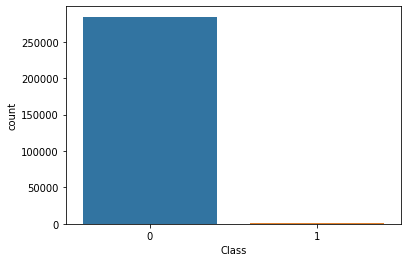

In [7]:
import seaborn as sns
sns.countplot(df['Class'])

In [14]:
#Create an ANN and solve this problem(ROC AUC)
X = df.drop(['Class','Time'], axis=1)
y = df['Class']

In [9]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [12]:
n_inputs=29

In [17]:
#Model creation
model = Sequential()
model.add(Dense(62, activation='relu', input_dim=n_inputs, kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=20,verbose=1)

Epoch 1/20
6231/6231 [==============================] - 15s 2ms/step - loss: 0.0851
Epoch 2/20
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0105
Epoch 3/20
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0111
Epoch 4/20
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0075
Epoch 5/20
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0072
Epoch 6/20
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0088
Epoch 7/20
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0092
Epoch 8/20
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0057
Epoch 9/20
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0064
Epoch 10/20
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0065
Epoch 11/20
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0056
Epoch 12/20
6231/6231 [==============================] - 12s 2ms/step - lo

In [18]:
from sklearn.metrics import roc_auc_score
y_hat=model.predict(X_test)

print(roc_auc_score(y_test,y_hat))

0.955301061425895
